In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model, to_categorical
from sklearn.metrics import classification_report
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()
    
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, 1,  imsize , imsize)
    x_test = x_test.reshape(-1, 1, imsize , imsize)
    return x_train, y_train, x_test, y_test

In [29]:
num_classes = 10
img_rows = img_cols = 28
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

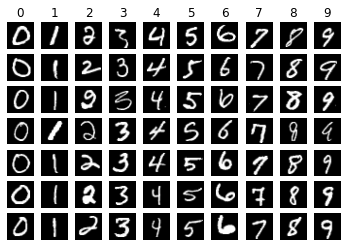

In [30]:
classes = list(np.arange(num_classes))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow((x_train[idx]*255).reshape(img_cols, img_cols).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [16]:
inp = Input((1, img_rows, img_cols)) # Входной слой
x = Dropout(0.3)(inp)
x = Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(units = 32, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inp, outputs = output)

In [17]:
model.summary()
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 28, 28)]       0         
                                                                 
 dropout_2 (Dropout)         (None, 1, 28, 28)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 28, 8)          2024      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 14, 8)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 112)               0         
                                                                 
 dropout_3 (Dropout)         (None, 112)               0         
                                                           

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [19]:
epochs = 20
history = model.fit(x_train, y_train, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_test, y_test))
model.save('mnist/mnist_class_conv2d.model')

Epoch 1/20
469/469 - 8s - loss: 0.0446 - accuracy: 0.6663 - val_loss: 0.0168 - val_accuracy: 0.8965 - 8s/epoch - 18ms/step
Epoch 2/20
469/469 - 6s - loss: 0.0249 - accuracy: 0.8327 - val_loss: 0.0131 - val_accuracy: 0.9162 - 6s/epoch - 12ms/step
Epoch 3/20
469/469 - 6s - loss: 0.0221 - accuracy: 0.8511 - val_loss: 0.0116 - val_accuracy: 0.9245 - 6s/epoch - 13ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0204 - accuracy: 0.8637 - val_loss: 0.0111 - val_accuracy: 0.9295 - 6s/epoch - 14ms/step
Epoch 5/20
469/469 - 6s - loss: 0.0196 - accuracy: 0.8684 - val_loss: 0.0105 - val_accuracy: 0.9333 - 6s/epoch - 13ms/step
Epoch 6/20
469/469 - 6s - loss: 0.0190 - accuracy: 0.8724 - val_loss: 0.0103 - val_accuracy: 0.9333 - 6s/epoch - 13ms/step
Epoch 7/20
469/469 - 6s - loss: 0.0182 - accuracy: 0.8783 - val_loss: 0.0095 - val_accuracy: 0.9394 - 6s/epoch - 13ms/step
Epoch 8/20
469/469 - 6s - loss: 0.0176 - accuracy: 0.8829 - val_loss: 0.0094 - val_accuracy: 0.9404 - 6s/epoch - 12ms/step
Epoch 9/20
469/4

INFO:tensorflow:Assets written to: mnist/mnist_class_conv2d.model\assets


INFO:tensorflow:Assets written to: mnist/mnist_class_conv2d.model\assets


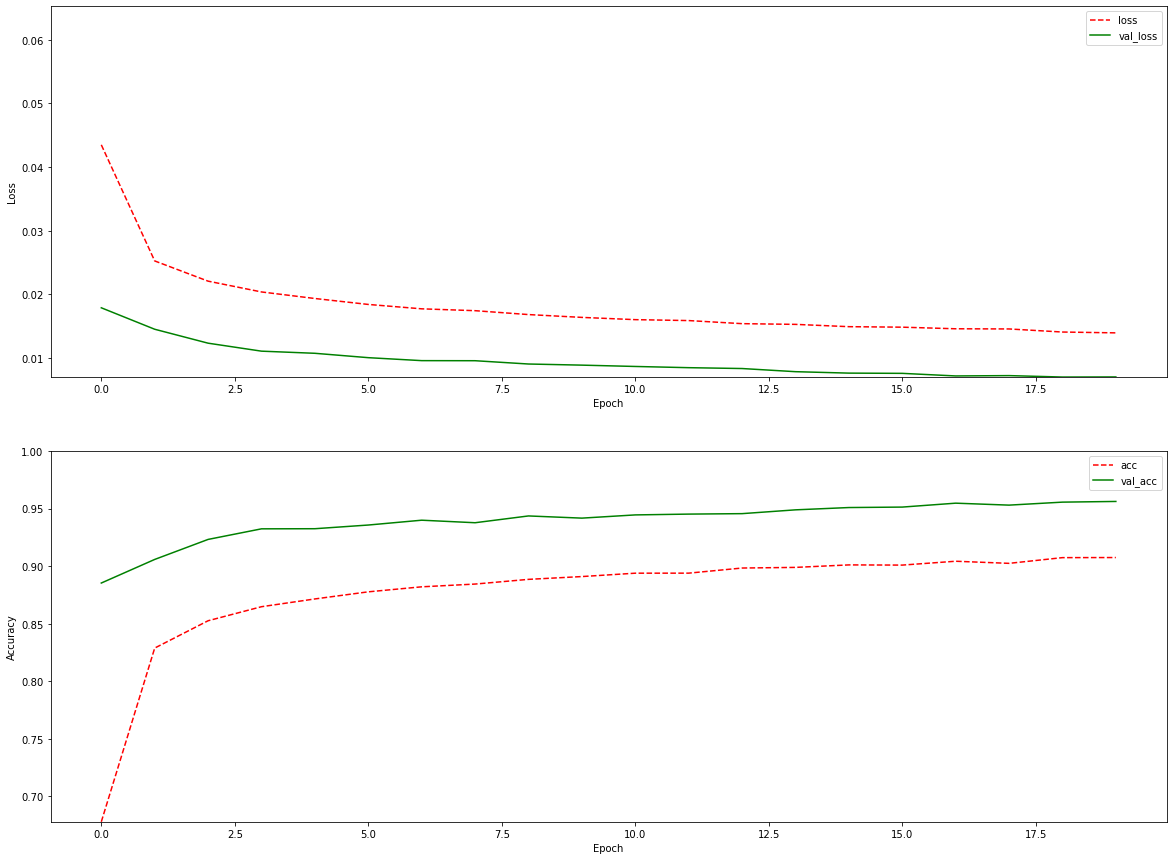

In [11]:
one_plot(history.history['loss'], history.history['val_loss'],
         history.history['accuracy'], history.history['val_accuracy'])

In [8]:
model = load_model('mnist/mnist_class_conv2d.model')
y_pred = model.predict(x_test)
predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
true_labels = np.array([np.argmax(x) for x in y_test], dtype = np.int32)
print(classification_report(true_labels, predicted_labels))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.95      0.93      0.94      1010
           4       0.97      0.93      0.95       982
           5       0.95      0.93      0.94       892
           6       0.94      0.97      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.93      0.93       974
           9       0.90      0.95      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# Main Task

In [79]:
num_classes = 10
batch_size = 128 
epochs = 15
img_rows = img_cols = 28
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

In [80]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [81]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 28, 28)]       0         
                                                                 
 dropout_6 (Dropout)         (None, 1, 28, 28)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 28, 8)          2024      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 14, 8)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 112)               0         
                                                                 
 dropout_7 (Dropout)         (None, 112)               0         
                                                           

In [108]:
number_of_tests = 6
classes = list(np.arange(num_classes))
report_list = []
history_list = []
for i in range(1, number_of_tests):
    train_indices = 0
    print(f"\n Training №{i} \n")
    # modifying train data and labels
    samples_per_class = 1000*i
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        if y==0 :
            train_indices = idxs
        else:
            train_indices = np.concatenate((train_indices, idxs))
    i_x_train = x_train[train_indices]
    i_y_train = y_train[train_indices]
    #print(pd.Series(i_y_train).value_counts())
    categorical_y_train = tf.keras.utils.to_categorical(i_y_train, num_classes)
    categorical_y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    
    # building model
    inp = Input((1, img_rows, img_cols))
    x = Dropout(0.3)(inp)
    x = Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(x)
    x = Flatten()(x)
    x = Dropout(0.3)(x)
    x = Dense(units = 32, activation = 'relu')(x)
    output = Dense(num_classes, activation = 'softmax')(x)
    model = Model(inputs = inp, outputs = output)
    model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])
    
    # fit + report rememberance
    history = model.fit(i_x_train, categorical_y_train, batch_size = 128, epochs = epochs,
                    verbose = 2, validation_data = (x_test, categorical_y_test))
    history_list.append(history)
    y_pred = model.predict(x_test)
    predicted_labels = np.array([np.argmax(x) for x in y_pred], dtype = np.int32)
    true_labels = np.array([np.argmax(x) for x in y_test], dtype = np.int32)
    report_list.append(classification_report(y_test, predicted_labels))


 Training №1 

Epoch 1/15
79/79 - 3s - loss: 0.0822 - accuracy: 0.3131 - val_loss: 0.0551 - val_accuracy: 0.6814 - 3s/epoch - 32ms/step
Epoch 2/15
79/79 - 1s - loss: 0.0496 - accuracy: 0.6444 - val_loss: 0.0276 - val_accuracy: 0.8242 - 1s/epoch - 14ms/step
Epoch 3/15
79/79 - 2s - loss: 0.0368 - accuracy: 0.7434 - val_loss: 0.0226 - val_accuracy: 0.8560 - 2s/epoch - 21ms/step
Epoch 4/15
79/79 - 1s - loss: 0.0328 - accuracy: 0.7733 - val_loss: 0.0196 - val_accuracy: 0.8751 - 1s/epoch - 15ms/step
Epoch 5/15
79/79 - 1s - loss: 0.0306 - accuracy: 0.7864 - val_loss: 0.0182 - val_accuracy: 0.8838 - 1s/epoch - 17ms/step
Epoch 6/15
79/79 - 2s - loss: 0.0289 - accuracy: 0.8000 - val_loss: 0.0176 - val_accuracy: 0.8857 - 2s/epoch - 23ms/step
Epoch 7/15
79/79 - 2s - loss: 0.0271 - accuracy: 0.8168 - val_loss: 0.0163 - val_accuracy: 0.8971 - 2s/epoch - 21ms/step
Epoch 8/15
79/79 - 2s - loss: 0.0266 - accuracy: 0.8188 - val_loss: 0.0161 - val_accuracy: 0.8973 - 2s/epoch - 21ms/step
Epoch 9/15
79/79

Epoch 6/15
391/391 - 6s - loss: 0.0175 - accuracy: 0.8836 - val_loss: 0.0085 - val_accuracy: 0.9453 - 6s/epoch - 16ms/step
Epoch 7/15
391/391 - 5s - loss: 0.0169 - accuracy: 0.8864 - val_loss: 0.0082 - val_accuracy: 0.9471 - 5s/epoch - 14ms/step
Epoch 8/15
391/391 - 5s - loss: 0.0162 - accuracy: 0.8930 - val_loss: 0.0079 - val_accuracy: 0.9485 - 5s/epoch - 13ms/step
Epoch 9/15
391/391 - 5s - loss: 0.0158 - accuracy: 0.8954 - val_loss: 0.0079 - val_accuracy: 0.9480 - 5s/epoch - 13ms/step
Epoch 10/15
391/391 - 4s - loss: 0.0152 - accuracy: 0.8995 - val_loss: 0.0077 - val_accuracy: 0.9483 - 4s/epoch - 11ms/step
Epoch 11/15
391/391 - 6s - loss: 0.0149 - accuracy: 0.9019 - val_loss: 0.0073 - val_accuracy: 0.9517 - 6s/epoch - 16ms/step
Epoch 12/15
391/391 - 6s - loss: 0.0147 - accuracy: 0.9026 - val_loss: 0.0071 - val_accuracy: 0.9529 - 6s/epoch - 15ms/step
Epoch 13/15
391/391 - 5s - loss: 0.0144 - accuracy: 0.9043 - val_loss: 0.0069 - val_accuracy: 0.9553 - 5s/epoch - 13ms/step
Epoch 14/15


In [109]:
for i, lst in enumerate(report_list):
    print(f"\n Training №{i+1} \n")
    print(lst)


 Training №1 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.97      0.97      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.94      0.86      0.90      1010
           4       0.88      0.94      0.91       982
           5       0.92      0.88      0.90       892
           6       0.92      0.94      0.93       958
           7       0.94      0.89      0.92      1028
           8       0.84      0.91      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


 Training №2 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.93   

In [126]:
len(history_list)

5

In [170]:
def one_plot(loss, val_loss, acc, val_acc, num_of_graph=0):
    #if (num_of_graph==0):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[0].set_title(f"Training №{num_of_graph + 1}")
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

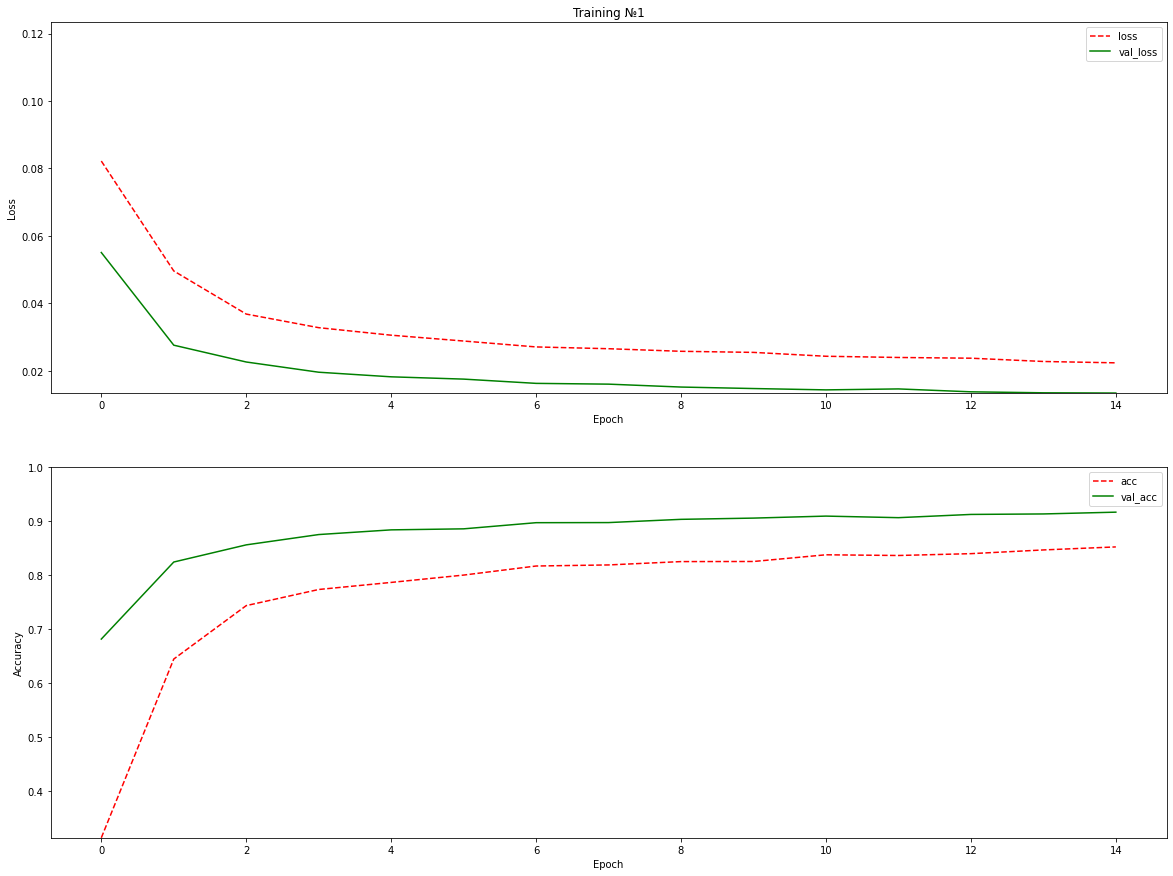

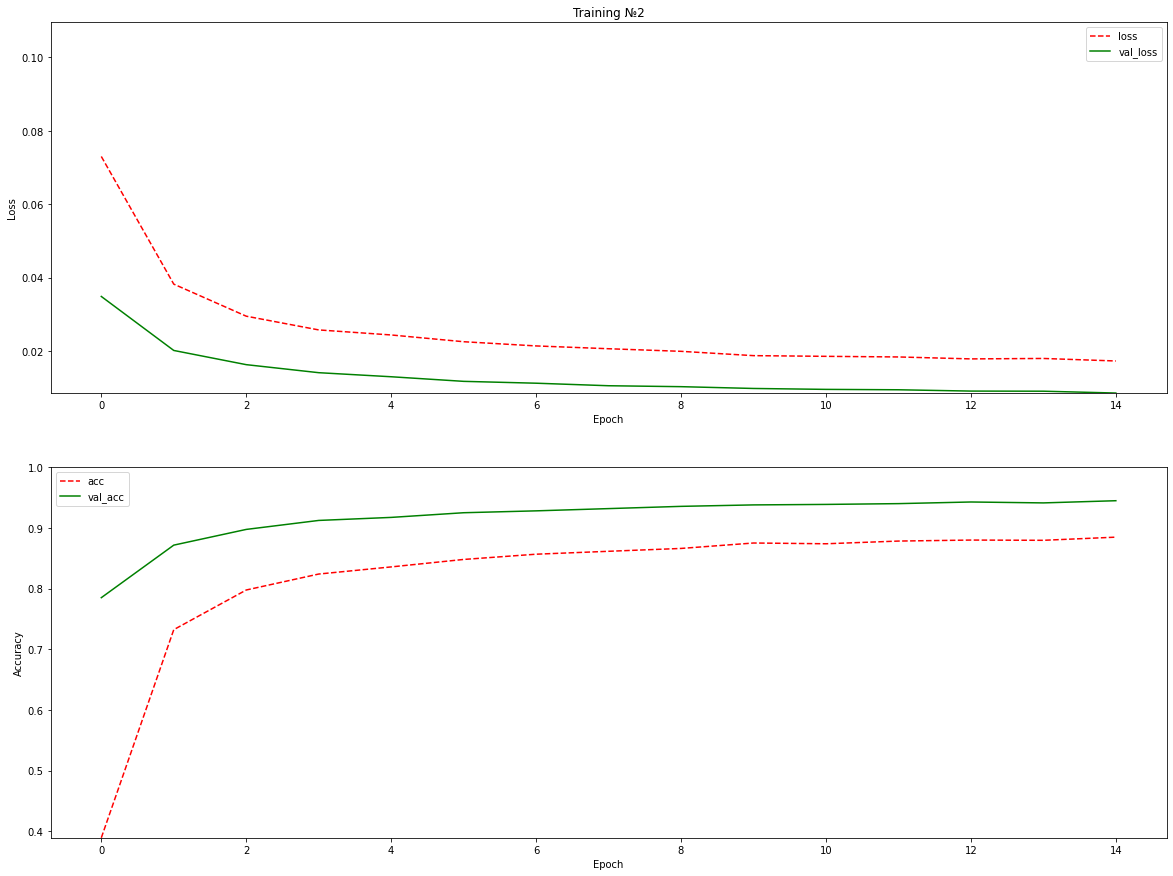

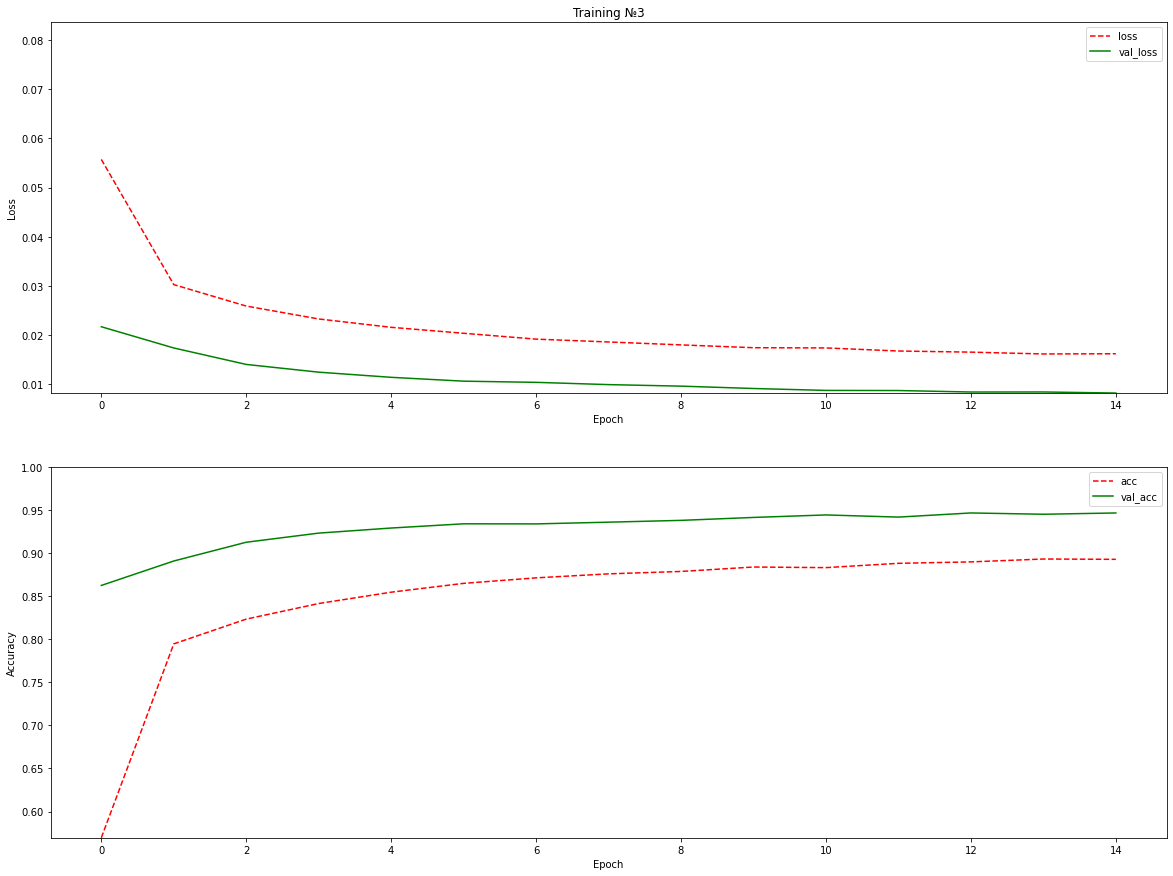

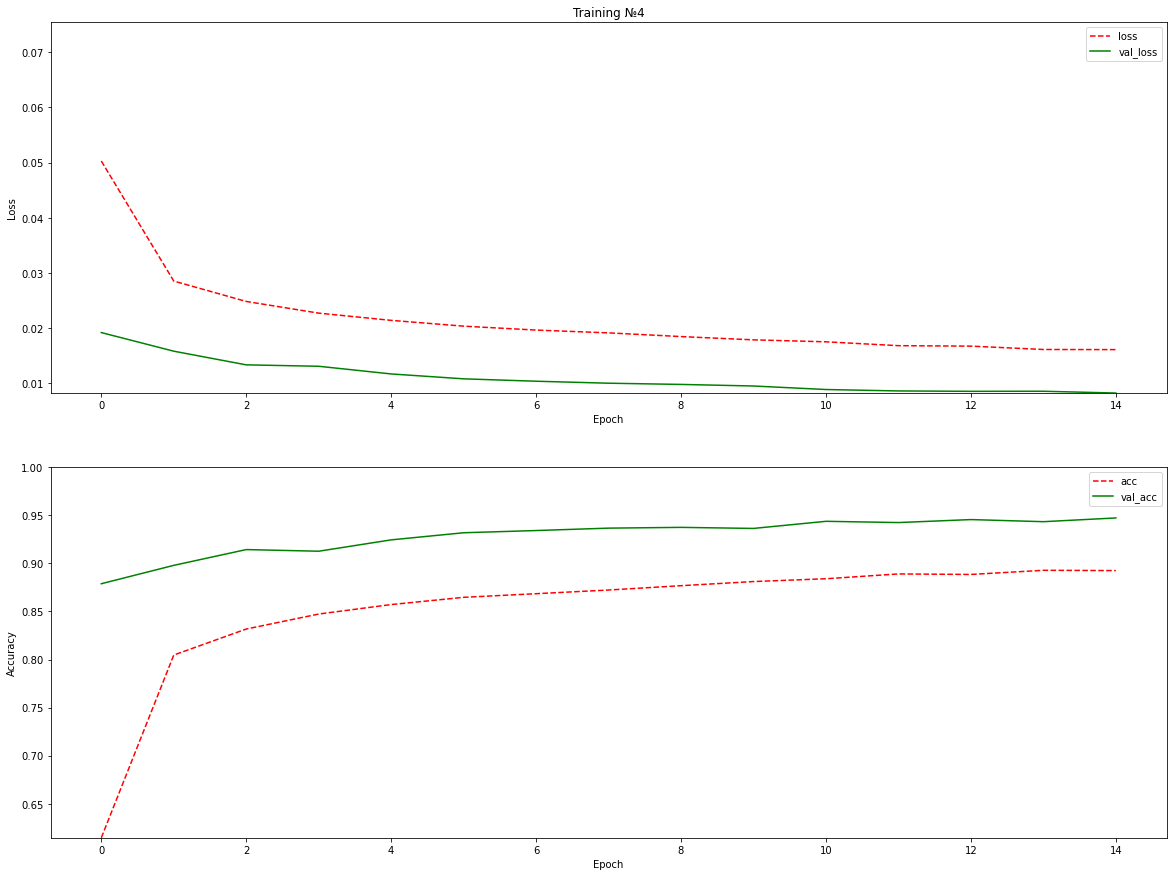

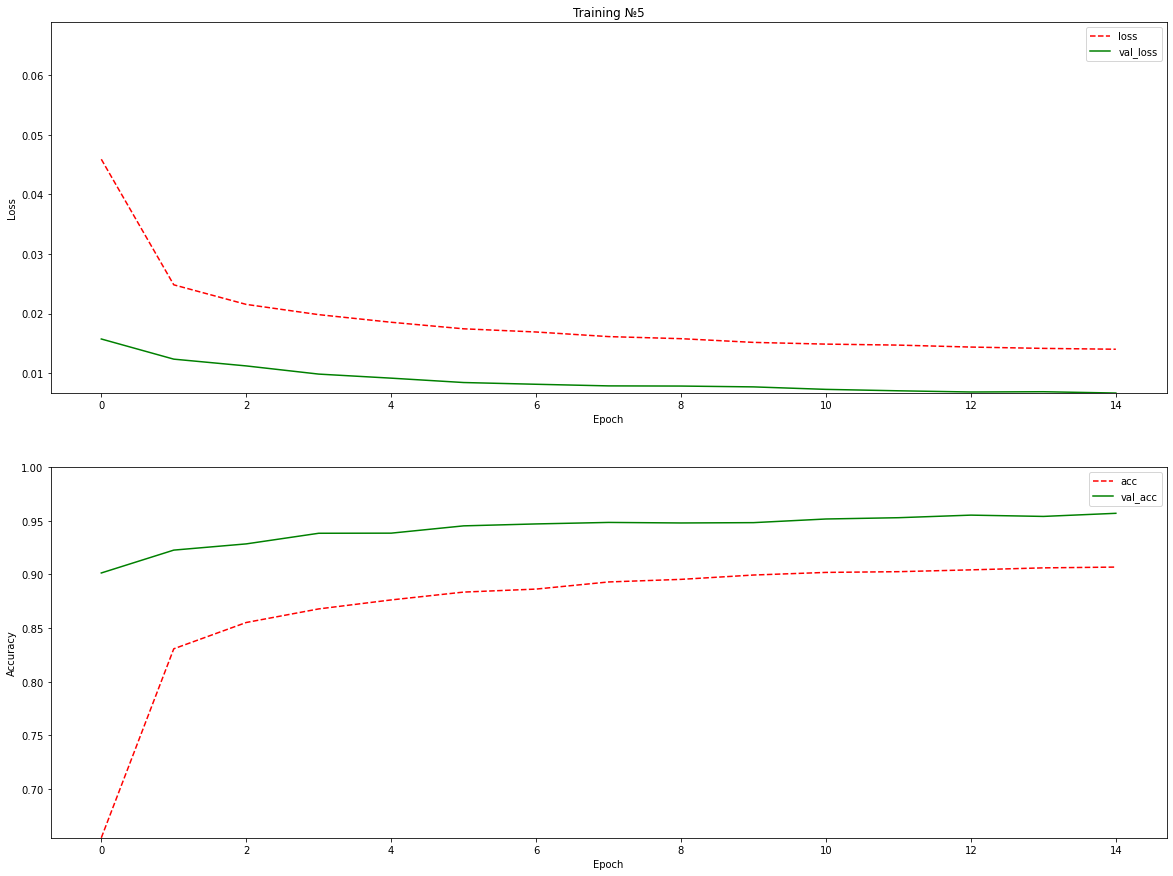

In [171]:
#fig, ax = plt.subplots(len(history_list), 2, figsize=(20,15))
for i, hist in enumerate(history_list):
    hist = hist.history
    one_plot(hist['loss'], hist['val_loss'],
         hist['accuracy'], hist['val_accuracy'], i)

<AxesSubplot:>

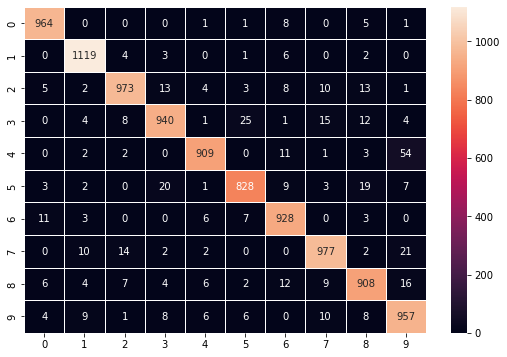

In [20]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt="d", linewidths=.5, ax=ax)

TORCH

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchsummary import summary

In [8]:
num_classes = 10
batch_size = 128 
epochs = 20
img_rows = img_cols = 28
file_image_train = 'mnist/images_trn.bin'
file_lable_train = 'mnist/labels_trn.bin'
file_image_test = 'mnist/images_tst.bin'
file_lable_test = 'mnist/labels_tst.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

In [15]:
def train(train_loader, test_loader, in_train, in_test, epoch):
    train_loss = test_loss = 0
    model.train() # Режим обучения
    for batch_no, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        print(data)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    model.eval() # Режим оценки
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item() * data.size(0)
    train_loss = train_loss / in_train
    test_loss = test_loss / in_test
    print('Эпоха: {} Потери: обучение: {:.6f} \tпроверка: {:.6f}'.format(
            epoch + 1, train_loss, test_loss))


In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dropout = nn.Dropout(p = 0.3)
        self.conv1 = nn.Conv2d(1, 8, kernel_size = 3)
        self.max_pool2d1 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*13*13, 32)
        self.fc2 = nn.Linear(32, num_classes)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool2d1(x) # print(x.size())
        x = x.view(-1, 8*13*13)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim = -1)
model = Net() # Формируем модель НС
##    print(model)
summary(model, (1, img_rows, img_cols), batch_size = 128)
x_train = [[x, int(y)] for x, y in zip(x_train, y_train)]
x_test = [[x, int(y)] for x, y in zip(x_test, y_test)]
train_loader = DataLoader(x_train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(x_test, batch_size = batch_size, shuffle = True)
criterion = nn.CrossEntropyLoss() # Функция потерь
# Число примеров в обучающем и проверочном множествах
in_train = len(train_loader.sampler) # или: len(trn_loader.dataset) - 60000
in_test = len(test_loader.sampler) # или: len(y_tst) – 10000   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [128, 8, 26, 26]              80
         MaxPool2d-2           [128, 8, 13, 13]               0
           Dropout-3                [128, 1352]               0
            Linear-4                  [128, 32]          43,296
            Linear-5                  [128, 10]             330
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 7.96
Params size (MB): 0.17
Estimated Total Size (MB): 8.51
----------------------------------------------------------------


In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
for ep in range(epochs): 
    train(train_loader, test_loader, in_train, in_test, epochs)
torch.save(model.state_dict(), fn_w)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
